In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preprocessing

In [3]:
# first = checking null data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [6]:
# input data for null data in column 'Age'
data.loc[data['Age'].isnull(), 'Age'] = data['Age'].median()

In [7]:
# second - checking duplicate data
data.duplicated().sum()

0

In [8]:
# engineering columns 'Sex'
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
# last - define X & y
X = data[['Pclass','Age','SibSp','Parch','Fare','Sex_male']]
y = data['Survived']

# Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# agar splitting tidak berubah, diberi random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 45)

In [12]:
# scaling
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [14]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
332,1,38.0,0,1,153.4625,1
281,3,28.0,0,0,7.8542,1
147,3,9.0,2,2,34.3750,0
11,1,58.0,0,0,26.5500,0
405,2,34.0,1,0,21.0000,1


In [15]:
X_train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,-1.532879,0.655795,-0.474774,0.744162,2.320077,0.735612
1,0.842333,-0.120045,-0.474774,-0.465526,-0.483321,0.735612
2,0.842333,-1.594141,1.332921,1.953851,0.027284,-1.359412
3,-1.532879,2.207475,-0.474774,-0.465526,-0.123371,-1.359412
4,-0.345273,0.345459,0.429074,-0.465526,-0.230225,0.735612


# Classification Model

## Library

In [16]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [17]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    print(tp, tn, fp, fn)

    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)

    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')

## KNN

### Find Optimal value of K

In [18]:
error_rate = []
# Will take some time
for i in range(1,40):

 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

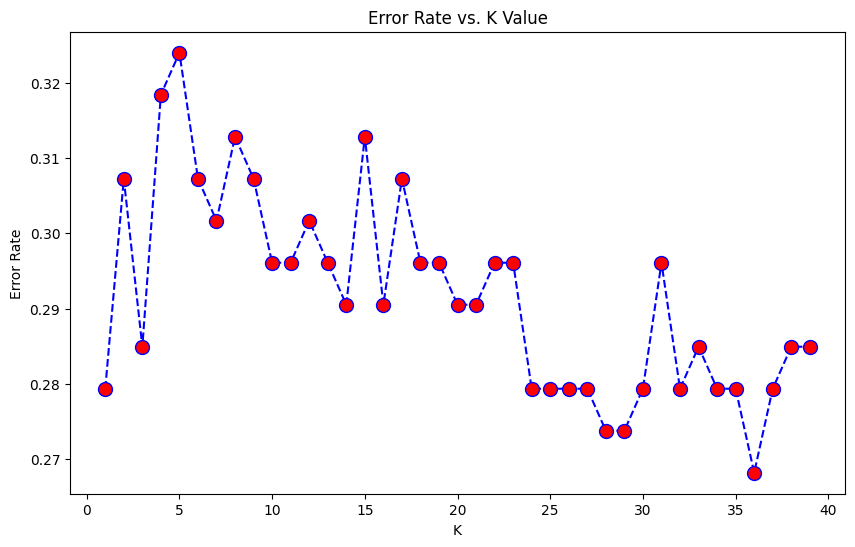

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### KNN Model

In [20]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [21]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [22]:
classification_eval(y_train, y_train_pred, 'KNN Training')

205 399 33 75
Evaluation Model: KNN Training
[[399  33]
 [ 75 205]]
Accuracy   : 84.83 %
Precision  : 86.13 %
Recall     : 73.21 %


In [23]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

48 103 14 14
Evaluation Model: KNN Testing
[[103  14]
 [ 14  48]]
Accuracy   : 84.36 %
Precision  : 77.42 %
Recall     : 77.42 %


## Decision Tree

### Find Optimal Parameter

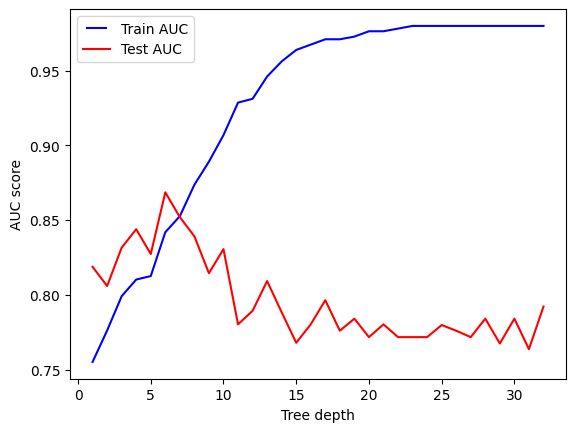

In [24]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=int(max_depth))
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

### Decision Tree Model

In [25]:
dectree = DecisionTreeClassifier(max_depth=18)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18)

In [26]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [27]:
pd.DataFrame(y_test_pred, columns=['Survived'])

,Survived
0,0
1,0
2,1
3,1
4,0
...,...
174,0
175,0
176,0
177,1


In [28]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

265 430 2 15
Evaluation Model: Decision Tree Training
[[430   2]
 [ 15 265]]
Accuracy   : 97.61 %
Precision  : 99.25 %
Recall     : 94.64 %


## Random Forest

In [29]:
ranfor = RandomForestClassifier(max_depth=18)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=18)

In [30]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [31]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

273 427 5 7
Evaluation Model: Random Forest Training
[[427   5]
 [  7 273]]
Accuracy   : 98.31 %
Precision  : 98.2 %
Recall     : 97.5 %


In [32]:
classification_eval(y_test, y_test_pred, 'Random Forest testing')

51 99 18 11
Evaluation Model: Random Forest testing
[[99 18]
 [11 51]]
Accuracy   : 83.8 %
Precision  : 73.91 %
Recall     : 82.26 %


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [34]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [36]:
classification_eval(y_train, y_train_pred, 'Logistic Regression Training')

196 363 69 84
Evaluation Model: Logistic Regression Training
[[363  69]
 [ 84 196]]
Accuracy   : 78.51 %
Precision  : 73.96 %
Recall     : 70.0 %


In [37]:
classification_eval(y_test, y_test_pred, 'Logistic Regression Testing')

48 102 15 14
Evaluation Model: Logistic Regression Testing
[[102  15]
 [ 14  48]]
Accuracy   : 83.8 %
Precision  : 76.19 %
Recall     : 77.42 %
